# Стандартные методы и функции для строк

##    in, find, index, starts/ends, rfind

Проверка вхождения строки в строку:

In [1]:
print('abc' in 'abcba')
print('abce' in 'abcba')

True
False


Если интересует место, где именно строка начинает входить в строку:

In [2]:
print('cabcd'.find('abc')) # Индекс первого вхождения или -1

1


In [3]:
print('cabcd'.find('aec'))

-1


In [4]:
print(str.find.__doc__)

S.find(sub[, start[, end]]) -> int

Return the lowest index in S where substring sub is found,
such that sub is contained within S[start:end].  Optional
arguments start and end are interpreted as in slice notation.

Return -1 on failure.


In [5]:
print('cabcd'.index('abc')) # Индекс первого вхождения или ValueError
print('cabcd'.index('aec'))

1


ValueError: substring not found

In [6]:
s = 'The man in black fled across the desert, and the gunslinger followed'
print(s.startswith('The man in black'))

True


In [7]:
print(str.startswith.__doc__)

S.startswith(prefix[, start[, end]]) -> bool

Return True if S starts with the specified prefix, False otherwise.
With optional start, test S beginning at that position.
With optional end, stop comparing S at that position.
prefix can also be a tuple of strings to try.


In [9]:
print(s.startswith(('The woman', 'The dog', 'The man in black')))

True


In [10]:
s = 'image.png'
print(s.endswith('.png'))

True


`.count()` находит число непересекающихся вхождений:

In [12]:
s = 'abacaba'
print(s.count('aba'))

s = 'ababa'
print(s.count('aba'))

2
1


Правосторонние аналоги функций:

In [13]:
s = 'abacaba'
print(s.rfind('aba'))

4


##      upper, lower, replace, split, strip, join

`upper(), lower()`

In [14]:
s = 'The man in black fled across the desert, and the gunslinger followed'
print(s.lower())
print(s.upper())

the man in black fled across the desert, and the gunslinger followed
THE MAN IN BLACK FLED ACROSS THE DESERT, AND THE GUNSLINGER FOLLOWED


In [15]:
print(s.count('the'))
print(s.lower().count('the'))

2
3


`replace()`

In [17]:
s = '1,2,3,4'
print(s)
print(s.replace(',', ', '))
print(s.replace(',', ', ', 2))

1,2,3,4
1, 2, 3, 4
1, 2, 3,4


`split()`

In [20]:
s = '1 2 3 4'
print(s.split())
print(s.split(' ', 2))

s = '1\t\t 2    3 \n             4'
print(s.split())


['1', '2', '3', '4']
['1', '2', '3 4']
['1', '2', '3', '4']


`strip()`

In [21]:
s = '      1, 2, 3, 4                     '
print(repr(s.rstrip()))
print(repr(s.lstrip()))
print(repr(s.strip()))

'      1, 2, 3, 4'
'1, 2, 3, 4                     '
'1, 2, 3, 4'


In [22]:
s = '_*__1, 2, 3, 4__*_'
print(repr(s.rstrip("*_")))
print(repr(s.lstrip("*_")))
print(repr(s.strip("*_")))

'_*__1, 2, 3, 4'
'1, 2, 3, 4__*_'
'1, 2, 3, 4'


`join()` - принимает то, по чему можно проитерироваться (например `map object`). 

Элементы последовательности должны быть строками.

In [23]:
numbers = map(str, [1, 2, 3, 4, 5])
print(repr(' '.join(numbers)))

'1 2 3 4 5'


##       format, f-строки

In [24]:
capital = 'London is the capital of Great Britain'

template = '{} is the capital of {}'
print(template.format('London', 'Great Britain'))
print(template.format('Vaduz', 'Liechtenstein'))

London is the capital of Great Britain
Vaduz is the capital of Liechtenstein


Использование именованных аргументов:

In [25]:
template = '{capital} is the capital of {country}'
print(template.format(capital='London', country='Great Britain'))
print(template.format(country='Liechtenstein', capital='Vaduz'))

London is the capital of Great Britain
Vaduz is the capital of Liechtenstein


----------

Благодаря форматированию можно обращаться к аттрибутам объекта:

In [26]:
import requests
template = 'Response from {0.url} with {0.status_code}'

res = requests.get('https://docs.python.org/3.5/')
print(template.format(res))

res = requests.get('https://docs.python.org/3.5/random')
print(template.format(res))

Response from https://docs.python.org/3.5/ with 200
Response from https://docs.python.org/3.5/random with 404


Интересуют только 3 знака после запятой:

In [30]:
from random import random

x = random()
print(x)
print("{:.3}".format(x))

0.6865281596172743
0.687


`f-строки`:

In [32]:
capital_country = {"Russia": "Moscow",
                   "United States": "Washington",
                   "Canada": "Ottawa",
                   "Germany": "Berlin",
                   "France": "Paris",
                   "Great Britain": "London"}


for country, capital in capital_country.items():
    print(f"{country}: {capital}") # f-строка

Russia: Moscow
United States: Washington
Canada: Ottawa
Germany: Berlin
France: Paris
Great Britain: London


## Задача 1

Вашей программе на вход подаются три строки `s, a, b`, состоящие из строчных латинских букв.

За одну операцию вы можете заменить все вхождения строки `a` в строку `s` на строку `b`.

Например, `s = "abab"`, `a = "ab"`, `b = "ba"`, тогда после выполнения одной операции строка `s` перейдет в строку `"baba"`, после выполнения двух и операций – в строку `"bbaa"`, и дальнейшие операции не будут изменять строку `s`.

Необходимо узнать, после какого минимального количества операций в строке `s` не останется вхождений строки `a`. Если операций потребуется более 1000, выведите `Impossible`.

Выведите одно число – минимальное число операций, после применения которых в строке `s` не останется вхождений строки `a`, или `Impossible`, если операций потребуется более 1000.

In [34]:
print(str.replace.__doc__)

S.replace(old, new[, count]) -> str

Return a copy of S with all occurrences of substring
old replaced by new.  If the optional argument count is
given, only the first count occurrences are replaced.


In [43]:
def main():
    s, a, b = input(), input(), input()

    ans = 'Impossible'

    if a not in s:
        print(0)
        return
    elif a in b:
        print(ans)
        return

    for i in range(1000):
        new_s = s.replace(a, b)
        if s == new_s:
            ans = i
            break
        s = new_s
    print(ans)

main()

aabbcc
aa
aaa
Impossible


In [46]:
s, a, b = input(), input(), input()

ans = 'Impossible'

if a not in s:
    print(0)
elif a in b:
    print(ans)
else:
    for i in range(1000):
        if s == s.replace(a, b):
            ans = i
            break
        s = s.replace(a, b)
    print(ans)

ababa
a
b
1


## Задача 2

Вашей программе на вход подаются две строки `s` и `t`, состоящие из строчных латинских букв.

Выведите одно число – количество вхождений строки `t` в строку `s`.

Пример:

`s = "abababa"`

`t = "aba"`

Вхождения строки `t` в строку`s`:

**aba**baba

ab**aba**ba

abab**aba**

In [47]:
print(str.startswith.__doc__)

S.startswith(prefix[, start[, end]]) -> bool

Return True if S starts with the specified prefix, False otherwise.
With optional start, test S beginning at that position.
With optional end, stop comparing S at that position.
prefix can also be a tuple of strings to try.


In [48]:
s = 'abba'
s.startswith('b')

False

In [49]:
print(str.find.__doc__)

S.find(sub[, start[, end]]) -> int

Return the lowest index in S where substring sub is found,
such that sub is contained within S[start:end].  Optional
arguments start and end are interpreted as in slice notation.

Return -1 on failure.


In [55]:
s = 'aaaaa'
t = 'a'

count, i = 0, 0
while s.find(t, i) != -1:
    count += 1
    i = s.find(t, i) + 1
print(count)

5


# Регулярные выражения

##     Регулярки, сырые строки

Клевая статья - [Регулярные выражения в Python](https://habr.com/ru/post/349860/)

Регулярные выражения - одно из самых мощных средств поиска в текстовых документах.

Базовая концепция - с помощью регулярок описываем шаблон, а потом можем проверить, подходит ли строка под шаблон. Или в тексте можно найти все подстроки, походящие под шаблон.

Что такое сырые строки и что их отличает от обычных:

In [58]:
x = 'hello\n"world'
print(x)

hello
"world


Чтобы указать интерпретатору, что все символу нужно использовать ровно в том же виде, в котором они указаны (сырая строка):

In [59]:
x = r'hello\n"world' # raw
print(x)

hello\n"world


Некоторые метасимволы регулярок используют `\`, поэтому для описания шаблонов регулярок используются сырые строки.

##     re.match, re.search, re.finall, re.sub

In [1]:
import re

print(re.match)
print(re.search)
print(re.findall)
print(re.sub)

<function match at 0x000001DF6226DEA0>
<function search at 0x000001DF622B6620>
<function findall at 0x000001DF622B6840>
<function sub at 0x000001DF622B66A8>


- `re.match` берет шаблон и строку, и проверяет, подходит ли строка под шаблон
- `re.search` берет строку и находит первую подстроку, которая подходит под шаблон 
- `re.findall` находит все подстроки нашей строки, которые подходят под шаблон
- `re.sub` заменяет все вхождения подстрок, которые подходят под шаблон, чем-то другим

In [3]:
pattern = r'abc'
string = 'abcdd'
match_object = re.match(pattern, string)
print(match_object)

<_sre.SRE_Match object; span=(0, 3), match='abc'>


Аттрибут `match` объекта `match object` содержит вхождения шаблона внутри строки;

Аттрибут `span`, который позволяет понять, с какой и по какую позицию в строке находится вхождение шаблона в строку. Числа внутри `span` - те же числа, которые используем при слайсинге.

Функция `match` берет строку, и бежит по ней с самого начала до тех пор, пока какой-нибудь префикс строки не подойдет по регулярку. 

Как только она его находит - возвращает в качестве `match object`

`re.match` ищет совпадение по заданному шаблону в **начале** строки

In [4]:
# Если строка не подходит под шаблон:
pattern = r'abc'
string = 'adcdd'
match_object = re.match(pattern, string)
print(match_object)

None


In [5]:
# Если строка не подходит под шаблон:
pattern = r'abc'
string = 'babcdd'
match_object = re.match(pattern, string)
print(match_object)

None


`re.search`:

In [6]:
pattern = r'abc'
string = 'babcdd'
match_object = re.search(pattern, string)
print(match_object)

<_sre.SRE_Match object; span=(1, 4), match='abc'>


**Метасимволы**

`[]` - в них указываем то множество символов, которые подходят под шаблон

In [7]:
pattern = r'a[abc]c'

s1 = 'aacdd'
s2 = 'abcdd'
s3 = 'accdd'
for string in [s1, s2, s3]:
    match_object = re.search(pattern, string)
    print(match_object)

<_sre.SRE_Match object; span=(0, 3), match='aac'>
<_sre.SRE_Match object; span=(0, 3), match='abc'>
<_sre.SRE_Match object; span=(0, 3), match='acc'>


`findall`:

In [8]:
pattern = r'a[abc]c'

string = 'abc, acc, aac'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['abc', 'acc', 'aac']


`sub`:

In [10]:
pattern = r'a[abc]c'

string = 'abc, acc, aac'
fixed_typos = re.sub(pattern, 'abc', string)
print(fixed_typos)

abc, abc, abc


##   Метасимволы, экранирование

Экранирование метасимволов (если мы хотим найти эти символы в выражении):

In [11]:
import re

pattern = r' english?'
string = 'Do you speak english?'
match = re.search(pattern, string)
print(match)

<_sre.SRE_Match object; span=(12, 20), match=' english'>


In [12]:
pattern = r' english\?'
string = 'Do you speak english?'
match = re.search(pattern, string)
print(match)

<_sre.SRE_Match object; span=(12, 21), match=' english?'>


`. ^ $ * + ? { } [ ] \ | ( )` — метасимволы

`[ ]` — можно указать множество подходящих символов

`.` - любой символ, кроме переноса строки

`^` - карет, обозначает либо начало строки, либо инвертирование группы символов. (например: `"^[^0-9]"` — не-цифра в начале строки).

`\d` ~ `[0-9]` — цифры

`\D` ~ `[^0-9]` - НЕ цифры

`\s` ~ `[ \t\n\r\f\v]` — пробельные символы (`\f` - перенос страницы, `\v` - вертикальная табуляция)

`\S` ~ `[^ \t\n\r\f\v]` - НЕ пробельные символы

`\w` ~ `[a-zA-Z0-9_]` — буквы + цифры + _

`\W` ~ `[^a-zA-Z0-9_]`

In [13]:
# Диапазон, в котором подходят символы:
pattern = r'a[a-zA-Z]c'
string = 'acc'
match_object = re.match(pattern, string)
print(match_object)

string = 'abc, acc, aac, aFc, azc'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

fixed_typos = re.sub(pattern, 'abc', string)
print(fixed_typos)

<_sre.SRE_Match object; span=(0, 3), match='acc'>
['abc', 'acc', 'aac', 'aFc', 'azc']
abc, abc, abc, abc, abc


##    Метасимволы повторов, жадный и ленивый подход

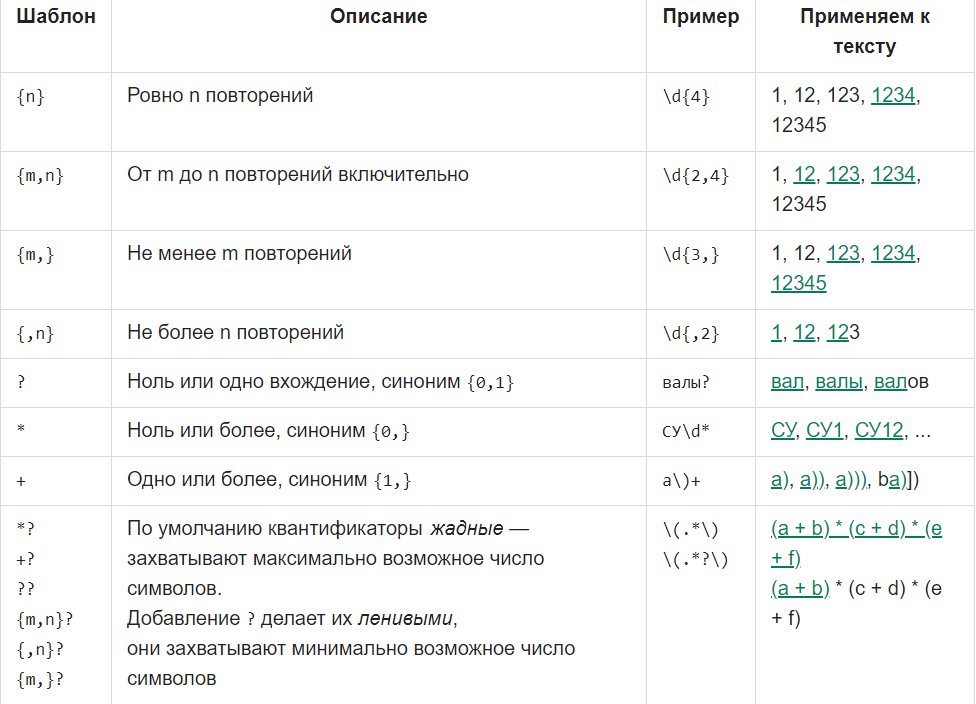

По умолчанию метасимволы повторов - жадные, т.е. они пытаются в себя вовлечь как можно больше символов, чтобы регулярка удовлетворилась.

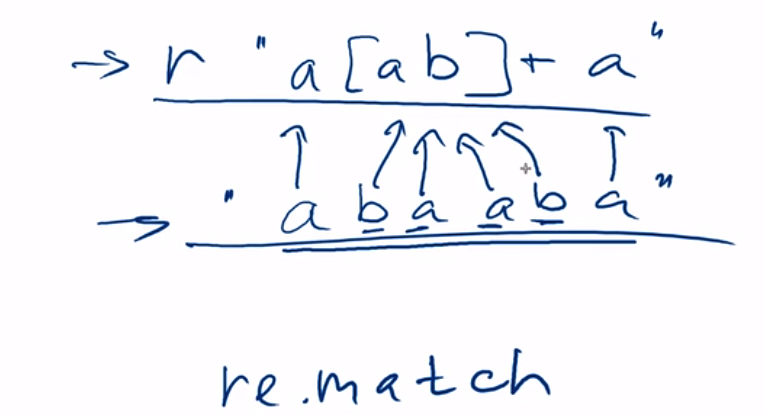

При жадном подходе сначала пытаемся выбрать строку максимальной длины, которая нам удовлетворяет, а затем проверить - подходит ли то, что осталось под остаток шаблона.

Если нет - то выкидываем символ с конца и снова проверяем, и т.д.

In [14]:
import re

pattern = r'a[ab]+a'
string = 'abaaba'
print(re.match(pattern, string))
print(re.findall(pattern, string))

<_sre.SRE_Match object; span=(0, 6), match='abaaba'>
['abaaba']


Ленивый подход - минимально возможное количество символов:

In [15]:
import re

pattern = r'a[ab]+?a'
string = 'abaaba'
print(re.match(pattern, string))
print(re.findall(pattern, string))

<_sre.SRE_Match object; span=(0, 3), match='aba'>
['aba', 'aba']


##    Группировка, | , findall при группировке

Используя регулярки, можно группировать символы.

Это нужно например для того, чтобы мы могли использовать метасимвол повтора для какой-либо группы символов, а не одиночного символа. 

In [2]:
import re

pattern = r'(test)*' # Хотим повторить применить квантификатор к группе символов
string1 = 'test'
string2 = 'testtest'
for string in (string1, string2):
    match = re.match(pattern, string)
    print(match)

<_sre.SRE_Match object; span=(0, 4), match='test'>
<_sre.SRE_Match object; span=(0, 8), match='testtest'>


Очень близок к группировке символ **или** - `|`

In [3]:
import re

pattern = r'(test|text)*' # Хотим повторить применить квантификатор к группе символов
string1 = 'test'
string2 = 'testtest'
string3 = 'testtext'
for string in (string1, string2, string3):
    match = re.match(pattern, string)
    print(match)

<_sre.SRE_Match object; span=(0, 4), match='test'>
<_sre.SRE_Match object; span=(0, 8), match='testtest'>
<_sre.SRE_Match object; span=(0, 8), match='testtext'>


Метасимвол `|` обладает наименьшим приоритетом в регулярках. 

Если мы не используем группы внутри регулярки, и там есть символ **или** - мы поделили выражение на 2 части, и находим либо 1-ую часть, либо 2-ую.

In [4]:
import re

pattern = r'abc|(test|text)*' # Хотим повторить применить квантификатор к группе символов
string1 = 'test'
string2 = 'testtest'
string3 = 'testtext'
string4 = 'abc'
for string in (string1, string2, string3, string4):
    match = re.match(pattern, string)
    print(match)

<_sre.SRE_Match object; span=(0, 4), match='test'>
<_sre.SRE_Match object; span=(0, 8), match='testtest'>
<_sre.SRE_Match object; span=(0, 8), match='testtext'>
<_sre.SRE_Match object; span=(0, 3), match='abc'>


Мы запоминаем, какие символы попали в конкретные группы.

In [6]:
import re

pattern = r'((abc)|(test|text)*)' # Хотим повторить применить квантификатор к группе символов
string1 = 'test'
string2 = 'testtest'
string3 = 'testtext'
string4 = 'testtexttest'
string5 = 'abc'
for string in (string1, string2, string3, string4, string5):
    match = re.match(pattern, string)
    print(match)
    print(match.groups())
    print()

<_sre.SRE_Match object; span=(0, 4), match='test'>
('test', None, 'test')

<_sre.SRE_Match object; span=(0, 8), match='testtest'>
('testtest', None, 'test')

<_sre.SRE_Match object; span=(0, 8), match='testtext'>
('testtext', None, 'text')

<_sre.SRE_Match object; span=(0, 12), match='testtexttest'>
('testtexttest', None, 'test')

<_sre.SRE_Match object; span=(0, 3), match='abc'>
('abc', 'abc', None)



Мы вывели на экран значения 3х групп (по количеству заданных в шаблоне групп). 

Каждой группе будет соответствовать пара скобок (открывающей и закрывающей).

Группы выводятся в том порядке, в котором перечислены открывающие скобки.

Если используем группы и метасимволы повторения, мы запомним последнее вхождение группы, которое у нас было - см. разницу `testtext` и `testtexttest`

In [8]:
import re

pattern = r'Hello (abc|test)'
string = 'Hello abc'
match = re.match(pattern, string)
print(match)
print(match.group())
print(match.group(0)) # Все совпадение с шаблоном целиком
print(match.group(1)) # Содержимое первой открывающей скобки группы

<_sre.SRE_Match object; span=(0, 9), match='Hello abc'>
Hello abc
Hello abc
abc


Самое хорошее - мы можем использовать уже найденную группу прямо внутри регулярки.

In [9]:
import re

pattern = r'(\w+)-\1'
string1 = 'test-test'
string2 = 'test-text'
for string in (string1, string2):
    match = re.match(pattern, string)
    print(match)

<_sre.SRE_Match object; span=(0, 9), match='test-test'>
None


Сначала задали группу `(\w+)`, затем с помощью `\1` говорим чтобы нашел такую же группу, которую собрал ранее.

Номер в `\number` соответствует номеру группы.

Одним из мощных механизмов является то, что мы можем переиспользовать эту группу внутри функций, например, в `re.sub`.

In [10]:
import re

pattern = r'(\w+)-\1'
string = 'test-test chow-chow'
duplicates = re.sub(pattern, r'\1', string)
print(duplicates)

test chow


Нужно быть аккуратнее с функцией `findall`. До того, как использовали группы, она возвращала целиком подстроки, которые подходили под шаблон, а теперь она возвращает кортеж групп.

In [14]:
import re

pattern = r'(\w+)-\1'
string = 'test-test chow-chow'
duplicates = re.findall(pattern, string)
print(duplicates)

['test', 'chow']


Если вместо одной группы используем две:

In [15]:
import re

pattern = r'((\w+)-\2)'
string = 'test-test chow-chow'
duplicates = re.findall(pattern, string)
print(duplicates)

[('test-test', 'test'), ('chow-chow', 'chow')]


Если не хотим ловить группу:
`(?:выражение)`

##      Флаги в регулярках

Внутрь каждой из этих регулярок можно передать флажок, чтобы указать, как вести себя с этой регуляркой.

Например - не интересует, заглавные либо строчные буквы:

In [16]:
import re

x = re.match(r'text', 'TEXt', re.IGNORECASE)
print(x)

<_sre.SRE_Match object; span=(0, 4), match='TEXt'>


Вывод дополнительной информации о регулярке:

In [17]:
import re

x = re.match(r'(te)*xt', 'TEXt', re.IGNORECASE | re.DEBUG)
print(x)

MAX_REPEAT 0 MAXREPEAT
  SUBPATTERN 1 0 0
    LITERAL 116
    LITERAL 101
LITERAL 120
LITERAL 116
<_sre.SRE_Match object; span=(0, 4), match='TEXt'>


In [18]:
x = re.match(r'(te)*?xt', 'TEXt', re.IGNORECASE | re.DEBUG)
print(x)

MIN_REPEAT 0 MAXREPEAT
  SUBPATTERN 1 0 0
    LITERAL 116
    LITERAL 101
LITERAL 120
LITERAL 116
<_sre.SRE_Match object; span=(0, 4), match='TEXt'>


## Задача 1

Вам дана последовательность строк.
Выведите строки, содержащие `"cat"` в качестве подстроки хотя бы два раза.

**Sample Input:**
```
catcat
cat and cat
catac
cat
ccaatt
```

**Sample Output:**
```
catcat
cat and cat
```

In [23]:
import sys
import re

pattern = r'cat'

# line = input()
for line in sys.stdin:
    line = line.rstrip()
    all_inclusions = re.findall(pattern, line)
    if len(all_inclusions) > 1:
        print(line)

cattattatat
['cat']


## Задача 2

Вам дана последовательность строк.

Выведите строки, содержащие `"cat"` в качестве слова.

**Примечание:**

Для работы со словами используйте группы символов `\b` и `\B`.

**Sample Input:**
```
cat
catapult and cat
catcat
concat
Cat
"cat"
!cat?
```
**Sample Output:**
```
cat
catapult and cat
"cat"
!cat?
```

In [26]:
import re
import sys

pattern = r'\bcat\b'

# line = 'cat..'
# result = re.search(pattern, line)
# print(result)

for line in sys.stdin:
    line = line.rstrip()
    result = re.search(pattern, line)
    if result:
        print(line)

<_sre.SRE_Match object; span=(0, 3), match='cat'>


## Задача 3

Вам дана последовательность строк.

Выведите строки, содержащие две буквы `"z"`, между которыми ровно **три** символа.

**Sample Input:**
```
zabcz
zzz
zzxzz
zz
zxz
zzxzxxz
```
**Sample Output:**
```
zabcz
zzxzz
```

In [ ]:
import re
import sys

pattern = r'z\S{3}z'

for line in sys.stdin:
    line = line.rstrip()
    if re.search(pattern, line):
        print(line)

## Задача 4

Вам дана последовательность строк.

Выведите строки, содержащие обратный слеш `"\"`.

**Sample Input:**
```
\w denotes word character
No slashes here
```
**Sample Output:**
```
\w denotes word character
```

In [ ]:
import re
import sys

pattern = r'\\'

for line in sys.stdin:
    line = line.rstrip()
    if re.search(pattern, line):
        print(line)

## Задача 5

Вам дана последовательность строк.

Выведите строки, содержащие слово, состоящее из двух одинаковых частей (тандемный повтор).

**Sample Input:**
```
blabla is a tandem repetition
123123 is good too
go go
aaa
```
**Sample Output:**
```
blabla is a tandem repetition
123123 is good too
```

In [ ]:
import re
import sys

pattern = r'\b(\S+)\1\b'

for line in sys.stdin:
    line = line.rstrip()
    if re.search(pattern, line):
        print(line)

## Задача 6

Вам дана последовательность строк.

В каждой строке замените все вхождения подстроки `"human"` на подстроку `"computer"` и выведите полученные строки.

**Sample Input:**
```
I need to understand the human mind
humanity
```
**Sample Output:**
```
I need to understand the computer mind
computerity
```

In [29]:
import re
import sys

pattern = r'human'

for line in sys.stdin:
    line = line.rstrip()
    print(re.sub(pattern, 'computer', line))

eesss


## Задача 7

Вам дана последовательность строк.

В каждой строке замените **первое** вхождение **слова**, состоящего только из латинских букв `"a"` (регистр не важен), на слово `"argh"`.

**Примечание:**
Обратите внимание на параметр `count` у функции `sub`.

**Sample Input:**
```
There’ll be no more "Aaaaaaaaaaaaaaa"
AaAaAaA AaAaAaA
```
**Sample Output:**
```
There’ll be no more "argh"
argh AaAaAaA
```

In [ ]:
import re
import sys

pattern = r'\b[aA]+\b'

for line in sys.stdin:
    line = line.rstrip()
    print(re.sub(pattern, 'argh', line, count=1))

## Задача 8

Вам дана последовательность строк.

В каждой строке поменяйте местами две первых буквы в каждом слове, состоящем хотя бы из двух букв.

Буквой считается символ из группы `\w`.

**Sample Input:**
```
this is a text
"this' !is. ?n1ce,
```
**Sample Output:**
```
htis si a etxt
"htis' !si. ?1nce,
```

In [32]:
import re
import sys

pattern = r'\b(\w)(\w)(\w*)\b'

for line in sys.stdin:
    line = line.rstrip()
    print(re.sub(pattern, r'\2\1\3', line))

## Задача 9

Вам дана последовательность строк.

В каждой строке замените все вхождения нескольких одинаковых букв на одну букву.

Буквой считается символ из группы `\w`.

**Sample Input:**
```
attraction
buzzzz
```
**Sample Output:**
```
atraction
buz
```

In [40]:
import re
import sys

pattern = r'(\w)\1+'

for line in sys.stdin:
    line = line.rsplit()
    print(re.sub(pattern, r'\1', line))

# Обзорно об интернете: http-запросы, html-страницы и requests

##     HTTP, URL, Request, Response

Вообще существует много протоколов для обмена информацией - для обмена почтой, файлами. 

Тут пойдет идет речь о `HTTP` протоколе - протокол обмена гипертекстом.

**Гипертекст** - текстовый документ, который содержит в себе ссылки на другие текстовые документы.

В `HTTP` протоколе 2 стороны, участвующие в общении:
1. Клиент (пользователи интернета)
2. Сервер (куда мы делаем запрос).

Запрашивем мы **ресурс**. 

**Ресурс** - веб страница, либо файлы.

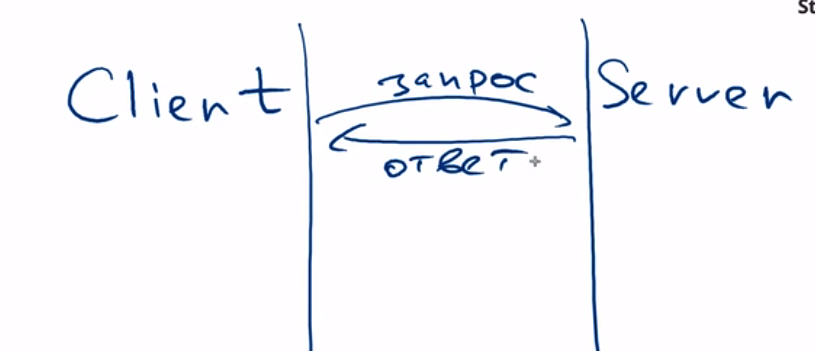

Ремурсы описываются с помощью `URL`.

`URL` - Uniform Resource Locator. Показывает, как и где можно достать данный ресурс.

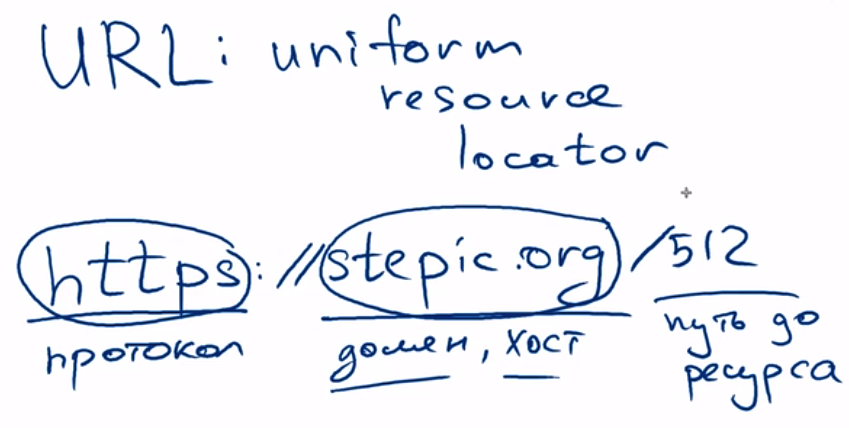

Протоколы необходимо указывать, т.к. они очень сильно отличаются друг от друга (например, протокол обмена гипертекста от обмена файлами).

Вторая компонента - домен. Он нужен, чтобы распознать, на какой из серверов нужно отправить запрос.

Третья компонента - путь до конкретного ресурса.

Как клиент и сервер обмениваются сообщениями:

`HTTP` - текстовый протокол, поэтому сначала клиент посылает запрос в текстовом формате определенного вида, а затем к нему приходит ответ также в текстовом формате.

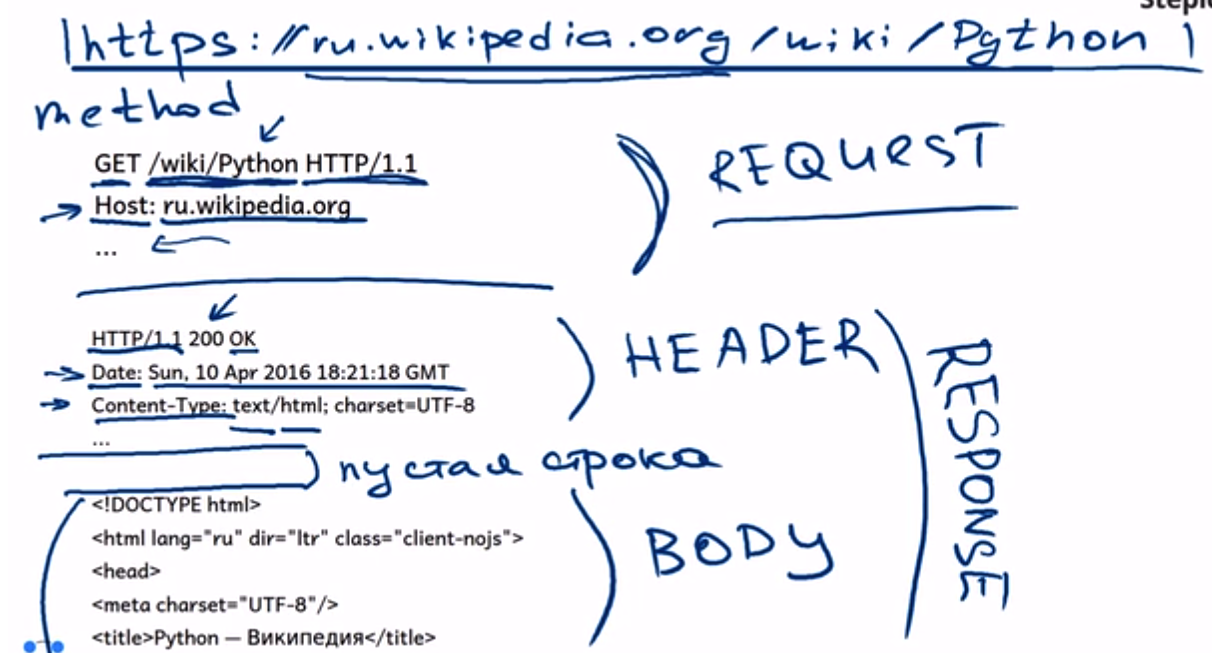

В первой строке запроса 3 вещи:
1. Метод, который применяем к ресурсу. `GET` - получить ресурс
2. Путь к ресурсу
3. Версия `HTTP-протокола`.

В настоящее время `HTTP` работает не только с текстом, можно и загружать картинки, видеозаписи и т.д.

В нем объявлены несколько методов, самые популярные - `GET` и `POST`.

Если ресурс является веб-страницей, то с помощью `GET` получим `HTML-код` страницы. Если картинку - бинарные данные.

Если используем `POST`, изменяем данные, хранящиеся на сервере и связанные с запрашиваемыми ресурсами (например, форма смена пароля).

`Host:` - имя заголовка. Часто псле следуют куча служебных.

`Response` возвращается в похожем формате.

`200 OK` - статус-код. Они бывают разные. `404` - ресурс не найден. `500` - серверная ошибка.

##   HTML

`HTML` - HyperText Markup Language используется для составления веб-страниц.

Теги определяют, как выглядит элемент страницы и где он должен быть.

Вся информация на странице доступна в `HTML`-коде.

Если хотим найти все ссылки на данной странице - тег `a`.

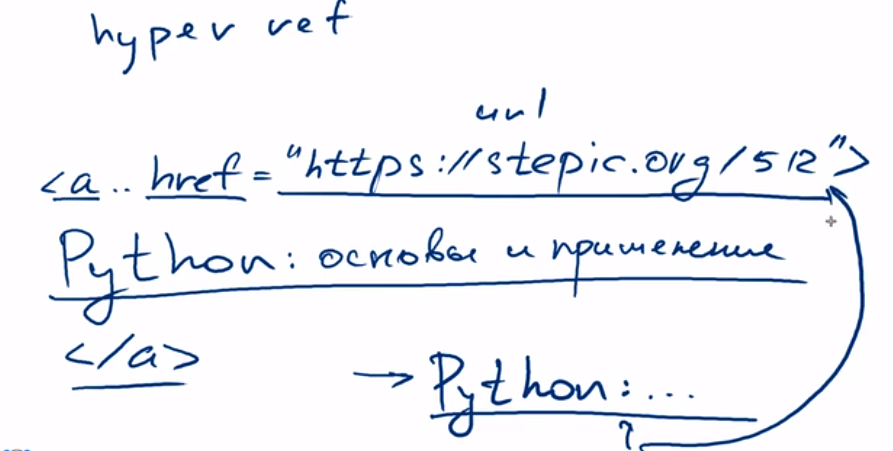

##    requests

Библиотека `requests` удобна. 

Выбираем метод `HTTP`, желаемый ресурс и несколько параметров.

Библиотека сама сформирует запрос, отправит его на сервер, получит и разберет ответ, а нужные детали ответа получаем с помощью аттрибутов.

In [2]:
import requests

res = requests.get('https://docs.python.org/3.5/')
print(res.status_code)
print(res.headers['Content-Type'])

200
text/html


Все `headers` доступны в качестве словаря.

Функция `.get` возвращает `response object`, содержащий в себе описание ответа сервера. 

In [3]:
print(res.content)

b'\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n  "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n\n<html xmlns="http://www.w3.org/1999/xhtml">\n  <head>\n    <meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><title>3.5.9 Documentation</title>\n    <link rel="stylesheet" href="_static/pydoctheme.css" type="text/css" />\n    <link rel="stylesheet" href="_static/pygments.css" type="text/css" />\n    \n    <script type="text/javascript" id="documentation_options" data-url_root="./" src="_static/documentation_options.js"></script>\n    <script type="text/javascript" src="_static/jquery.js"></script>\n    <script type="text/javascript" src="_static/underscore.js"></script>\n    <script type="text/javascript" src="_static/doctools.js"></script>\n    <script async="async" type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-AMS-MML_H

`res.content` возвращает бинарные данные, т.к. передаваться может не только текст, а и картинки и т.д.

Если уверены, что содержание - текст:

In [4]:
print(res.text)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"
  "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
  <head>
    <meta http-equiv="X-UA-Compatible" content="IE=Edge" />
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><title>3.5.9 Documentation</title>
    <link rel="stylesheet" href="_static/pydoctheme.css" type="text/css" />
    <link rel="stylesheet" href="_static/pygments.css" type="text/css" />
    
    <script type="text/javascript" id="documentation_options" data-url_root="./" src="_static/documentation_options.js"></script>
    <script type="text/javascript" src="_static/jquery.js"></script>
    <script type="text/javascript" src="_static/underscore.js"></script>
    <script type="text/javascript" src="_static/doctools.js"></script>
    <script async="async" type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></scrip

In [9]:
import requests

res = requests.get('https://docs.python.org/3.5/_static/py.png')
print(res.status_code)
print(res.headers['Content-Type'])
print(res.content)

path = '3.3 HTTP/'

with open(path+'python.png', 'wb') as f:
    f.write(res.content)

200
image/png
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x10\x00\x00\x00\x10\x08\x06\x00\x00\x00\x1f\xf3\xffa\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00\x00\tpHYs\x00\x00\x0b\x13\x00\x00\x0b\x13\x01\x00\x9a\x9c\x18\x00\x00\x00\x07tIME\x07\xd8\x04\x1b\x118!\x063\'^\x00\x00\x027IDAT8\xcbe\x93OHUA\x14\x87\xbf{\xdf\xb3w{"\x94\x10\xa5\xd1&hS\x8b6\xadZ\xb4\x10\x1emB*xP\xdb\xc0MQ\xae\xdd\x04A\x8b "\xda)mZH\x1b\x17\x91 F\x11EF\x98\x96\xb6\xb5\x88\xcc2\x15\xd4\xfc\xf3\xee\x9dy3g\xe6\xb6\xf0\xde\xbc\xea\x81\xc3\xc0\xcc\xf7;\xe77\xcc\x9c\x80]\xd1\xfd\xe0\xed3i\x9as\xde\x99v\xb1M\xc4\x18\xa4\xa9\xb4U\xfa\xf1\xc7\xfe\xeb}\x80\x06\\\xce\x87\xbb\x0bx\'\x17G\xfaj\xedN,\xceZ\xbcX\xbcwQ\x1a\xf8\x9b\xc01 *\xf2{\n8k9\x7fg\x18\'v;\xad\xcd\x8f;\x80j\x91/\x03t?|\x7f\xdb[{\\\xac\n\x8cN\x06\x8dj\x94E\xc7%g\x0c\xe1\xbeJ=M}\xceW\x80\xd2\x8e\x02\x97\x1f}x\xed\xc4v\xa5^\xc0{\x02\xa0Tn\x81J\x15\x82\x12N\xec\x0e\x87\xe9\\}\xc1\xdbX\x8bn\xdc\xaf\

Для некоторых ресурсов можно указывать параметры, например, запрос в поисковике.

In [11]:
import requests

res = requests.get('https://yandex.ru/search/',
                  params={
                      'text': 'Stepik',
                      'test': 'test1',
                      'name': 'Name with Spaces',
                      'list': ['test1', 'test2']
                  })
print(res.status_code)
print(res.headers['Content-Type'])
print(res.url)

200
text/html; charset=utf-8
https://yandex.ru/search/?text=Stepik&test=test1&name=Name+with+Spaces&list=test1&list=test2


##  Задача 1

Рассмотрим два HTML-документа `A` и `B`.

Из `A` можно перейти в `B` за один переход, если в `A` есть ссылка на `B`, т. е. внутри `A` есть тег `<a href="B">`, возможно с дополнительными параметрами внутри тега.

Из `A` можно перейти в `B` за два перехода если существует такой документ `C`, что из `A` в `C` можно перейти за один переход и из `C` в `B` можно перейти за один переход.

Вашей программе на вход подаются две строки, содержащие `url` двух документов `A` и `B`.

Выведите `Yes`, если из `A` в `B` можно перейти за два перехода, иначе выведите `No`.

Обратите внимание на то, что не все ссылки внутри `HTML` документа могут вести на существующие `HTML` документы.

In [7]:
import re
import requests
import sys

link_a = r'https://stepic.org/media/attachments/lesson/24472/sample1.html'
link_b = r'https://stepic.org/media/attachments/lesson/24472/sample2.html'

# link_a = input()
# link_b = input()

res = requests.get(link_a)

# correct url pattern: r'<a[^>]*?href="(.*?)"[^>]*?>'
pattern = r'href="(\S+)"'
result = re.findall(pattern, res.text)
ans = 'No'
for link in result:
    res = requests.get(link)
    if link_b in re.findall(pattern, res.text):
        ans = 'Yes'
print(ans)


Yes


##  Задача 2

Вашей программе на вход подается ссылка на HTML файл.

Вам необходимо скачать этот файл, затем найти в нем все ссылки вида `<a ... href="..." ... >` и вывести список сайтов, на которые есть ссылка.

Сайтом в данной задаче будем называть имя домена вместе с именами поддоменов. То есть, это последовательность символов, которая следует сразу после символов протокола, если он есть, до символов порта или пути, если они есть, за исключением случаев с относительными ссылками вида
`<a href="../some_path/index.html">`.

Сайты следует выводить в алфавитном порядке.

**Пример HTML файла:**
```
<a href="http://stepic.org/courses">
<a href='https://stepic.org'>
<a href='http://neerc.ifmo.ru:1345'>
<a href="ftp://mail.ru/distib" >
<a href="ya.ru">
<a href="www.ya.ru">
<a href="../skip_relative_links">
```
**Пример ответа:**
```
mail.ru
neerc.ifmo.ru
stepic.org
www.ya.ru
ya.ru
```

In [37]:
import re
import requests

# link = 'http://pastebin.com/raw/7543p0ns'

# res = requests.get(link)
# html = res.text

html = """
<a href="http://stepic.org/courses">
<a href='https://stepic.org'>
<a href='http://neerc.ifmo.ru:1345'>
<a href="ftp://mail.ru/distib" >
<a href="ya.ru">
<a href="www.ya.ru">
<a href="../skip_relative_links">
"""

# html = """
# <a href=\"http://stepic.org/courses\">\
# <a href=\"ftp://www.mya.ru\">
# <a href='https://stepic.org'>
# <a link href='http://neerc.ifmo.ru:1345'>
# <a target=\"blank\" href='http://sasd.ifmo.ru:1345'>
# <a href='http://neerc.ifmo.ru:1345'>
# <a href=\"../some_path/index.html\">
# <a href=\"https://www.ya.ru\">
# <a href=\"ftp://mail.ru/distib\" >
# <a href=\"bya.ru\">
# <a href=\"http://www.ya.ru\">
# <a href=\"www.kya.ru\">
# <a href=\"../skip_relative_links\">
# """


pattern = r'<a[^>]*?href=["\'](?:\S*:\/\/)?(\w[\w.-]*)\S*["\']'

result = re.findall(pattern, html)

print(result)

sites = set()

for group in result:
    sites.add(group)

for site in sorted(sites):    
    print(site)

['stepic.org', 'stepic.org', 'neerc.ifmo.ru', 'mail.ru', 'ya.ru', 'www.ya.ru']
mail.ru
neerc.ifmo.ru
stepic.org
www.ya.ru
ya.ru


# Распространенные форматы текстовых файлов: CSV, JSON

##    CSV

Текстовые форматы бывают разные.

Табличный формат - `CSV` - Comma Separated Values. Он хорошо подходит для хранения данных, так как не хранит в себе ничего лишнего.

```
first name,last name,module1,module2,module3
student,best,100,100,100
student,good,90,90.2,100
```

In [ ]:
import csv

with open('example.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

Файл передаем в конструктор класса `reader`.

У него есть итератор, с помощью которого и перебираем строки.

Чтобы использовать `,`  не в качестве разделителя:
```
student,good,90,"90.2",100
```

В двойные кавычки нужно заключать значение, если часть значения находится на следующей строке.

Если значения разделены табуляцией - то это формат `.tsv` - Tab Separated Values.

При открытии таких файлов нужно указывать `delimeter='\t'`

Запись в файл:

In [ ]:
import csv

students = [
    ['Greg', 'Dean', 70, 80, 90, 'Good job, Greg'],
    ['Wirt', 'Wood', 80, 80.2, 80, 'Nicely done']
]

with open('example.csv', 'a') as f:
    writer = csv.writer(f)
    for student in students:
        writer.writerow(student)
#     writer.writerows(students)

`Writer` знает, когда нужно поместить значение в кавычки (например - `'Good job, Greg'`)

## Задача 1

Вам дана частичная выборка из датасета зафиксированных преступлений, совершенных в городе Чикаго с 2001 года по настоящее время.

Одним из атрибутов преступления является его тип – `Primary Type`.

Вам необходимо узнать тип преступления, которое было зафиксировано максимальное число раз в 2015 году.

In [1]:
import pandas as pd

path = '3.4 Text files formates/'

df = pd.read_csv(path+'Crimes.csv')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code
0,2383135,HH684629,10/01/2002 12:47:08 PM,032XX W ROOSEVELT RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,1134,11.0,24.0,29.0,06
1,2383437,HH693227,09/04/2002 09:30:00 PM,048XX W ARMITAGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,TAVERN/LIQUOR STORE,False,True,2522,25.0,31.0,19.0,08B
2,2383482,HH692935,10/04/2002 10:09:09 PM,116XX S MICHIGAN AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,532,5.0,9.0,53.0,26
3,2383568,HH690681,10/03/2002 05:00:00 AM,017XX W TOUHY AVE,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,2423,24.0,49.0,1.0,05
4,2457967,HH706178,10/11/2002 12:28:49 AM,023XX E 79TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,False,414,4.0,7.0,43.0,08B


In [3]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code'],
      dtype='object')

In [5]:
cols_to_drop = [
    'Location Description', 'Beat', 'District', 'Ward',
    'FBI Code', 'Case Number', 'Block', 'IUCR', 'Community Area'
]

ref_df = df.drop(columns=cols_to_drop, axis=1)
ref_df.head()

,ID,Date,Primary Type,Description,Arrest,Domestic
0,2383135,10/01/2002 12:47:08 PM,THEFT,RETAIL THEFT,True,False
1,2383437,09/04/2002 09:30:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,False,True
2,2383482,10/04/2002 10:09:09 PM,CRIMINAL TRESPASS,TO LAND,True,False
3,2383568,10/03/2002 05:00:00 AM,BURGLARY,FORCIBLE ENTRY,False,False
4,2457967,10/11/2002 12:28:49 AM,BATTERY,DOMESTIC BATTERY SIMPLE,False,False


In [6]:
ref_df['Date'] = pd.to_datetime(ref_df.Date)
ref_df.head()

,ID,Date,Primary Type,Description,Arrest,Domestic
0,2383135,2002-10-01 12:47:08,THEFT,RETAIL THEFT,True,False
1,2383437,2002-09-04 21:30:00,BATTERY,DOMESTIC BATTERY SIMPLE,False,True
2,2383482,2002-10-04 22:09:09,CRIMINAL TRESPASS,TO LAND,True,False
3,2383568,2002-10-03 05:00:00,BURGLARY,FORCIBLE ENTRY,False,False
4,2457967,2002-10-11 00:28:49,BATTERY,DOMESTIC BATTERY SIMPLE,False,False


In [7]:
ref_df.dtypes

ID                       int64
Date            datetime64[ns]
Primary Type            object
Description             object
Arrest                    bool
Domestic                  bool
dtype: object

In [11]:
df_2015 = ref_df.loc[ref_df.Date.dt.year == 2015]

In [12]:
df_2015.head()

,ID,Date,Primary Type,Description,Arrest,Domestic
23934,9975632,2015-01-11 18:40:00,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,True,False
24220,9911165,2015-01-01 01:40:00,BATTERY,PRO EMP HANDS NO/MIN INJURY,True,False
24221,9911168,2015-01-01 02:15:00,CRIMINAL DAMAGE,TO PROPERTY,False,False
24222,9911192,2015-01-01 02:30:00,ASSAULT,SIMPLE,False,False
24223,9911485,2015-01-01 07:15:00,BATTERY,DOMESTIC BATTERY SIMPLE,False,True


In [19]:
df_2015['Primary Type'].value_counts().idxmax()

'THEFT'

## JSON

`JSON` - JavaScript Object Notation.

Сначала использовался только в `JavaScript`, но теперь - это полноценный текстовый формат, который очень много где используется.

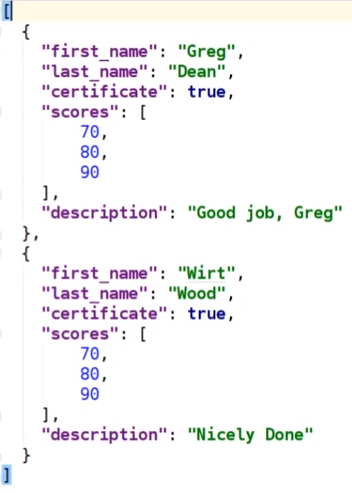

Все почти то же самое, что и словарь в Python.

Но есть небольшие детали:
- Ключом в `JSON` объекте может быть только строка;
- Значения `true` и `false` - с маленькой буквы;
- Значение `None` == `null` в `JSON`.

Для работы с `JSON` в Python есть библиотека `json`:

In [20]:
import json

student1 = {
    'first_name': 'Greg',
    'last_name': 'Dean',
    'scores': [70, 80, 90],
    'description': 'Good job, Greg',
    'certificate': True
}

student2 = {
    'first_name': 'Wirt',
    'last_name': 'Wood',
    'scores': [80, 80.2, 80],
    'description': 'Nicely Done',
    'certificate': True
}

data = [student1, student2]
print(json.dumps(data, indent=4, sort_keys=True))

[
    {
        "certificate": true,
        "description": "Good job, Greg",
        "first_name": "Greg",
        "last_name": "Dean",
        "scores": [
            70,
            80,
            90
        ]
    },
    {
        "certificate": true,
        "description": "Nicely Done",
        "first_name": "Wirt",
        "last_name": "Wood",
        "scores": [
            80,
            80.2,
            80
        ]
    }
]


Функция `dumps` принимает объект языка Python и возвращает соответствующее ему представление в формате `JSON`.

Для записи в файл:

In [ ]:
with open('students.json', 'w') as f:
    json.dump(data, f, indent=4, sort_keys=True)

Для получения объекта языка Python из формата `JSON` используется функция `loads`:

In [ ]:
data_again = json.loads(data_json)

Чтобы считать данные из файла в формате `JSON` используется функция `load`:

In [ ]:
with open('students.json', 'r') as f:
    data_again = json.load(f)

Практически все сущности в `JSON` существуют и в Python.

## Задача 2

Вам дано описание наследования классов в формате `JSON`.

Описание представляет из себя массив `JSON-объектов`, которые соответствуют классам. У каждого `JSON-объекта` есть поле `name`, которое содержит имя класса, и поле `parents`, которое содержит список имен прямых предков.

**Пример:**

`[{"name": "A", "parents": []}, {"name": "B", "parents": ["A", "C"]}, {"name": "C", "parents": ["A"]}]`

**Эквивалент на Python:**
```
class A:
    pass

class B(A, C):
    pass

class C(A):
    pass
```

Гарантируется, что никакой класс не наследуется от себя явно или косвенно, и что никакой класс не наследуется явно от одного класса более одного раза.

Для каждого класса вычислите предком скольких классов он является и выведите эту информацию в следующем формате.

`<имя класса> : <количество потомков>`

Выводить классы следует в лексикографическом порядке.

**Sample Input:**
```
[{"name": "A", "parents": []}, {"name": "B", "parents": ["A", "C"]}, {"name": "C", "parents": ["A"]}]
```
**Sample Output:**
```
A : 3
B : 1
C : 2
```

In [2]:
import json
# data = json.loads(input())

js = [
    {
        'name': 'A',
        'parents': []
    },
    {
        'name': 'B',
        'parents': ['A', 'C']
    },
    {
        'name': 'C',
        'parents': ['A']
    }
]

data, data2 = dict(), dict()

for node in js:
    data[node['name']] = node['parents']
    data2[node['name']] = 0

print(data)
print()
print(data2)

def count_childs(node, parents):
    for parent in parents:
        if parent not in visited:
            try:
                data2[parent] += 1
            except KeyError:
                data2[parent] = 1
            visited.add(parent)
        count_childs(parent, data[parent])

for node in data:
    visited = set()
    count_childs(node, data[node])


for node in data2:
    data2[node] += 1

print()

for key in sorted(data2):
    print(f'{key} : {data2[key]}')
    

{'A': [], 'B': ['A', 'C'], 'C': ['A']}

{'A': 0, 'B': 0, 'C': 0}

A : 3
B : 1
C : 2


# API

##   Принцип API

`API` (Application Programming Interface) описывает предоставляемую нам функциональность.

Например, стандартная библиотека Python предоставляет функциональность для работы с файлами. Есть например функция `open`, она хорошо задокументирована.

Так мы можем сказать, что Python предоставляет `API` для работы с файлами.

`API` позволяет абстрагироваться от реализации. 

Например, мы не знаем отличия файловых систем (`NTFS`, `FAT32`), не знаем работу с файлами в разных ОС, однако мы знаем, что если мы передадим файл в функцию `open`, то она откроет его для чтения.

Таким образом, `API` какого-либо модуля/сервиса - это набор функций, констант и методов, которые мы можем использовать. 

Про каждую из них должно быть известно, что она принимает, что возвращает и что делает, но может быть неизвестно, как она это делает.

##   API на примере OpenWeatherMap

`API` на примере работы с OpenWeatherMap

Почти все сервисы, предоставляющие `API`, требуют `API`-ключи.

Это связано с тем, что мы должны представиться сервису, чтобы он знал, кто делает запрос. Затем сервис собирает статистику.

Ответы часто приходят в формате `JSON`.

In [20]:
import requests

api_url = 'http://api.openweathermap.org/data/2.5/weather'

city = 'Saint Petersburg'

params = {
    'q': city,
    'appid': '11c0d3dc6093f7442898ee49d2430d20' 
}

res = requests.get(api_url, params=params)

print(res.status_code)
print(res.headers['Content-Type'])

200
application/json; charset=utf-8


In [21]:
print(res.json()) # returns json.loads(res.text)

{'coord': {'lon': 30.26, 'lat': 59.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 275.83, 'feels_like': 269.48, 'temp_min': 275.37, 'temp_max': 276.15, 'pressure': 1014, 'humidity': 47}, 'visibility': 10000, 'wind': {'speed': 5, 'deg': 270}, 'clouds': {'all': 26}, 'dt': 1586017898, 'sys': {'type': 1, 'id': 8926, 'country': 'RU', 'sunrise': 1585970057, 'sunset': 1586018944}, 'timezone': 10800, 'id': 498817, 'name': 'Saint Petersburg', 'cod': 200}


In [22]:
data = res.json()
print(data['main']['temp'])

275.83


--------------------------

In [28]:
import requests

api_url = 'http://api.openweathermap.org/data/2.5/weather'

city = input('Enter the city name: ')

params = {
    'q': city,
    'appid': '11c0d3dc6093f7442898ee49d2430d20',
    'units': 'metric'
}

res = requests.get(api_url, params=params)
data = res.json()

temp = data['main']['temp']

print(f'Current temperature in {city} is {temp} \u2103')

Enter the city name: Moscow
Current temperature in Moscow is 5.87 ℃


## Задача 1

В этой задаче вам необходимо воспользоваться `API` сайта `numbersapi.com`.

Вам дается набор чисел. Для каждого из чисел необходимо узнать, существует ли интересный математический факт об этом числе.

Для каждого числа выведите `Interesting`, если для числа существует интересный факт, и `Boring` иначе.

Выводите информацию об интересности чисел в таком же порядке, в каком следуют числа во входном файле.

*Пример запроса к интересному числу:*

`http://numbersapi.com/31/math?json=true`

*Пример запроса к скучному числу:*

`http://numbersapi.com/999/math?json=true`

**Пример входного файла:**
```
31
999
1024
502
```
**Пример выходного файла:**
```
Interesting
Boring
Interesting
Boring
```

In [42]:
import requests
import json

folder_path = '3.5 API/'
filename = 'dataset_24476_3 (1).txt'

def check_number(number):
    api_url = f'http://numbersapi.com/{number}/math'
    params = {
        'json': True
    }
    res = requests.get(api_url, params=params, timeout = 25)
    data = res.json()
    if data['found']:
        return 'Interesting'
    return 'Boring'

with open(folder_path + filename, 'r') as f:
    for line in f:
        number = line.strip()
        print(check_number(number))

Interesting
Boring
Interesting
Boring
Interesting
Boring
Boring
Boring
Interesting
Interesting
Boring
Boring
Interesting
Interesting
Interesting


## Задача 2

В этой задаче вам необходимо воспользоваться API сайта `artsy.net`

`API` проекта `Artsy` предоставляет информацию о некоторых деятелях искусства, их работах, выставках.

В рамках данной задачи вам понадобятся сведения о деятелях искусства (назовем их, условно, художники).

Вам даны идентификаторы художников в базе `Artsy`.

Для каждого идентификатора получите информацию о имени художника и годе рождения.

Выведите имена художников в порядке неубывания года рождения. В случае если у художников одинаковый год рождения, выведите их имена в лексикографическом порядке.

**Работа с API Artsy**

Полностью открытое и свободное `API` предоставляют совсем немногие проекты. В большинстве случаев, для получения доступа к `API` необходимо зарегистрироваться в проекте, создать свое приложение, и получить уникальный ключ (или токен), и в дальнейшем все запросы к `API` осуществляются при помощи этого ключа.

Чтобы начать работу с API проекта Artsy, вам необходимо пройти на стартовую страницу документации к API `https://developers.artsy.net/start` и выполнить необходимые шаги, а именно зарегистрироваться, создать приложение, и получить пару идентификаторов `Client Id` и `Client Secret`. Не публикуйте эти идентификаторы.

После этого необходимо получить токен доступа к `API`. На стартовой странице документации есть примеры того, как можно выполнить запрос и как выглядит ответ сервера. Мы приведем пример запроса на Python.

```
import requests
import json

client_id = '...'
client_secret = '...'

# инициируем запрос на получение токена
r = requests.post("https://api.artsy.net/api/tokens/xapp_token",
                  data={
                      "client_id": client_id,
                      "client_secret": client_secret
                  })

# разбираем ответ сервера
j = json.loads(r.text)

# достаем токен
token = j["token"]
```

Теперь все готово для получения информации о художниках. На стартовой странице документации есть пример того, как осуществляется запрос и как выглядит ответ сервера. 

**Пример запроса на Python.**
```
# создаем заголовок, содержащий наш токен
headers = {"X-Xapp-Token" : token}
# инициируем запрос с заголовком
r = requests.get("https://api.artsy.net/api/artists/4d8b92b34eb68a1b2c0003f4", headers=headers)

# разбираем ответ сервера
j = json.loads(r.text)
```
**Примечание:**

В качестве имени художника используется параметр `sortable_name` в кодировке `UTF-8`.

**Пример входных данных:**
```
4d8b92b34eb68a1b2c0003f4
537def3c139b21353f0006a6
4e2ed576477cc70001006f99
```
**Пример выходных данных:**
```
Abbott Mary
Warhol Andy
Abbas Hamra
```

**Примечание для пользователей Windows**

При открытии файла для записи на Windows по умолчанию используется кодировка `CP1251`, в то время как для записи имен на сайте используется кодировка `UTF-8`, что может привести к ошибке при попытке записать в файл имя с необычными символами. Вы можете использовать `print`, или аргумент `encoding` функции `open`.

In [56]:
import requests
import json

folder_path = '3.5 API/'
filename = 'dataset_24476_4 (1).txt'

client_id = 'f4085b109f99efd6f4c5'
client_secret = '252b32584f71f7f12efc646b3810aede'

# инициируем запрос на получение токена
r = requests.post("https://api.artsy.net/api/tokens/xapp_token",
                  data={
                      "client_id": client_id,
                      "client_secret": client_secret
                  })

# разбираем ответ сервера
j = json.loads(r.text)

# достаем токен
token = j["token"]

# создаем заголовок, содержащий наш токен
headers = {"X-Xapp-Token" : token}

artists = dict()

with open(folder_path+filename, 'r', encoding='utf-8') as f:
    for line in f:
        code = line.strip()
        
        # инициируем запрос с заголовком
        res = requests.get(f"https://api.artsy.net/api/artists/{code}", headers=headers, timeout=25)
        res.encoding = 'utf-8'
        data = res.json()

        name = data['sortable_name']
        year = data['birthday']

        artists[name] = year
    
for name in sorted(artists, key=lambda x: artists[x]):
    print(name)

Abraham Roentgen
Abbé Pierre Pacton
Abastenia St. Leger Eberle
Aalto Alvar
Abt Otto
Abend Harry
Abbott Angela
Abad Francesc
Abdelke Youssef
Abegg Jimmy
Tracy 168
Adach Adam
Ackermann Rita
Acetelli Mark
Abraham Poincheval


# XML, библиотека ElementTree, библиотека lxml

##   Структура XML

`XML` (eXtensible Markup Language) - расширяемый язык разметки.

Как и `HTML`, это теговый язык разметки, однако в `XML` более строгие правила.

Основное отличие - внутри `XML` мы сами определяем теги.

`HTML` используется в основном для отображения данных, а `XML` - для их хранения.

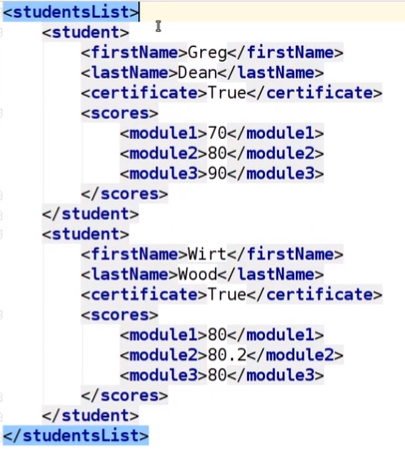

Что такое элементы в `XML`:

Элементы объявляются с помощью тегов.

- либо 2 тега, которые открываются и закрываются; 
- либо с помощью одного тега, который сам открывается и закрывается.

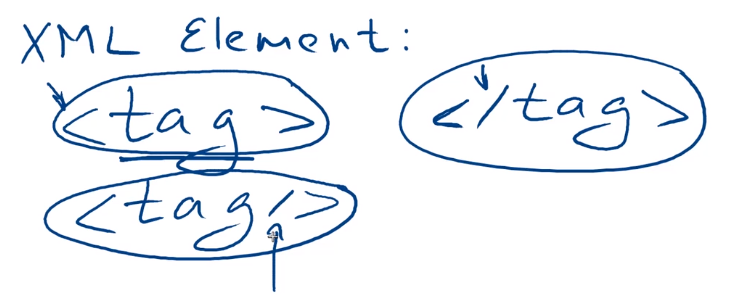

Все в `XML` - элементы. 

В нашем примере - студенты, имя, фамилия, оценки, каждая оценка...

Содержимым элемента является то, что заключено между тегами.

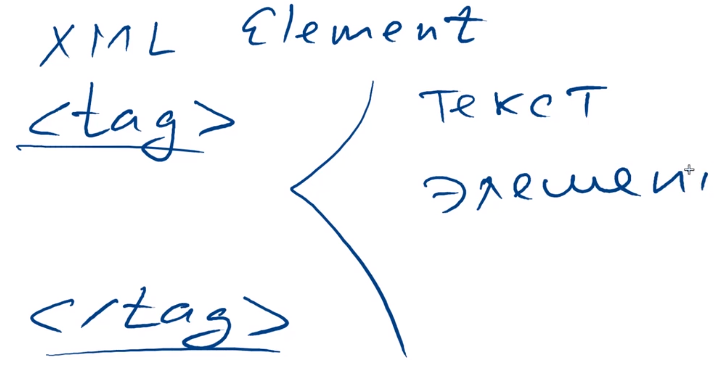

Также внутри элемента хранятся аттрибуты:

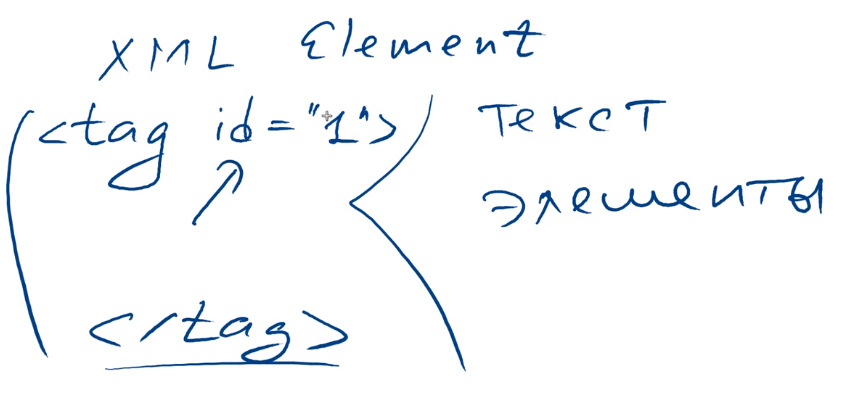

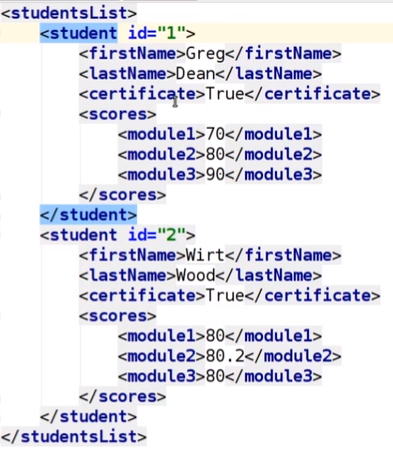

В `XML` мы сами придумываем формат, теги, аттрибуты.

Так как элементы в формате `XML` могут содержать в себе другие элементы, то данные в таком формате проще всего изображать в виде деревьев:

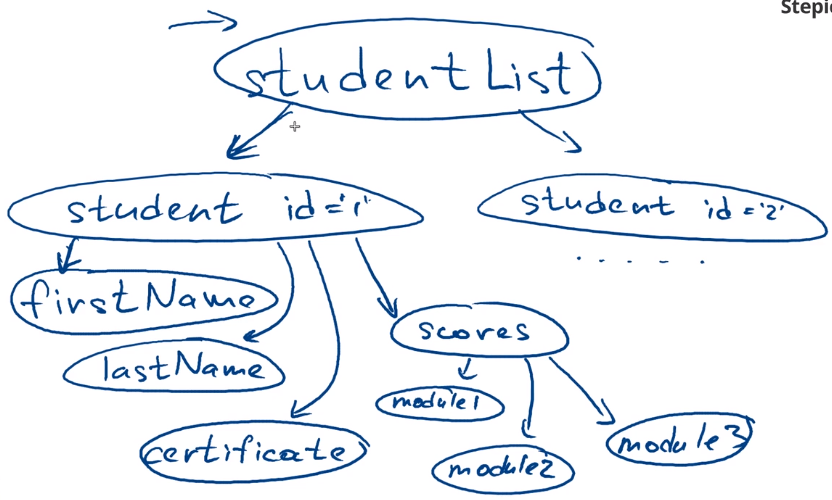

Такое представление данных продиктовано самим форматом.

Сам формат требует наличие выделенного корня - элемента, который содержит в себе все остальные элементы.

Все библиотеки, которые разбирают данные в формате `XML`, хранят его в виде дерева.

##    ElementTree

Для работы с `XML` есть библиотека `XML Element Tree`. 

In [5]:
from xml.etree import ElementTree

path = '3.6 XML/example.xml'

tree = ElementTree.parse(path)
root = tree.getroot()
# use root = ElementTree.fromstring(string_xml_data) to parse from str

print(root)
print(root.tag, root.attrib, '\n')

for child in root:
    print(child.tag, child.attrib, '\n')
    
print(root[0][0].text)

<Element 'studentsList' at 0x0000020D21048278>
studentsList {} 

student {'id': '1'} 

student {'id': '2'} 

Greg


Все элементы дерева имеют класс `Element`.

Корень обладает этим классом, все перебираемые объекты, дети детей и т.д.

Все имена методов и аттрибутов будут одинаковыми.

In [7]:
type(root), type(root[0][0])

(xml.etree.ElementTree.Element, xml.etree.ElementTree.Element)

In [8]:
for element in root.iter('scores'):
    print(element)

<Element 'scores' at 0x0000020D210AF9F8>
<Element 'scores' at 0x0000020D210AFC78>


In [9]:
for element in root.iter('scores'):
    score_sum = 0
    for child in element:
        score_sum += float(child.text)
    print(score_sum)

240.0
240.2


С помощью метода `iter` мы перебрали все интересующие элементы в поддереве.

С помощью метода `findall` мы можем перебрать только среди детей.

-------------------

Модификация деревьев:

In [11]:
from xml.etree import ElementTree

path = '3.6 XML/'
filename = 'example.xml'

tree = ElementTree.parse(path + filename)
root = tree.getroot()

tree.write(path+'example_copy.xml')

Пусть Greg заработал доп баллы в первом модуле:

In [12]:
greg = root[0]
module1 = next(greg.iter('module1'))

print(module1, module1.text)

<Element 'module1' at 0x0000020D2107CAE8> 70


In [13]:
module1.text = str(float(module1.text) + 30)
tree.write(path+'example_copy.xml')

In [14]:
certificate = greg[2]
certificate.set('type', 'with distinction')
tree.write(path+'example_copy.xml')

Добавление элементов:

In [15]:
description = ElementTree.Element('description')
description.text = 'Showed excellent skills during the course'
greg.append(description)

tree.write(path+'example_copy.xml')

Удаление элементов:

In [16]:
description = greg.find('description')
greg.remove(description)

tree.write(path+'example_copy.xml')

Составление дерева:

In [20]:
from xml.etree import ElementTree

path = '3.6 XML/'

root = ElementTree.Element('student')

first_name = ElementTree.SubElement(root, 'firstName')
first_name.text = 'Greg'

second_name = ElementTree.SubElement(root, 'secondName')
second_name.text = 'Dean'

scores = ElementTree.SubElement(root, 'scores')

module1 = ElementTree.SubElement(scores, 'module1')
module1.text = '100'

module2 = ElementTree.SubElement(scores, 'module2')
module2.text = '80'

module3 = ElementTree.SubElement(scores, 'module3')
module3.text = '90'

tree = ElementTree.ElementTree(root)
tree.write(path+'greg.xml')

Получили `XML` без переноса строк, но он синтаксически верен.

##     lxml

`HTML` также является теговым, там также есть аттрибуты.

Почему не используем для `HTML` те же механизмы разбора, что и для `XML`?

Большая часть `HTML` трафика является плохо сформированной.

Может быть такое, что открытый тег не закрывается, закрываем их в неправильном порядке, но браузер чудом все равно правильно отображает страницу.

Поэтому для работы с `HTML` используются сторонние библиотеки:
- `beautiful soup`;
- `lxml`

`lxml` пытается вести себя точно так же, как и `ElementTree`:

In [22]:
from lxml import etree
import requests

res = requests.get('https://docs.python.org/3/')
print(res.status_code)
print(res.headers['Content-Type'])

parser = etree.HTMLParser()
root = etree.fromstring(res.text, parser)

# print(root)
for element in root.iter('a'):
    print(element, element.attrib)


200
text/html
<Element a at 0x20d23a4ee08> {'href': 'genindex.html', 'title': 'General Index', 'accesskey': 'I'}
<Element a at 0x20d238810c8> {'href': 'py-modindex.html', 'title': 'Python Module Index'}
<Element a at 0x20d23a26088> {'href': 'https://www.python.org/'}
<Element a at 0x20d23a4ee08> {'href': '#'}
<Element a at 0x20d238810c8> {'class': 'biglink', 'href': 'whatsnew/3.8.html'}
<Element a at 0x20d23a26088> {'href': 'whatsnew/index.html'}
<Element a at 0x20d23881208> {'class': 'biglink', 'href': 'tutorial/index.html'}
<Element a at 0x20d238810c8> {'class': 'biglink', 'href': 'library/index.html'}
<Element a at 0x20d23a4ee08> {'class': 'biglink', 'href': 'reference/index.html'}
<Element a at 0x20d23a26088> {'class': 'biglink', 'href': 'using/index.html'}
<Element a at 0x20d23881208> {'class': 'biglink', 'href': 'howto/index.html'}
<Element a at 0x20d238810c8> {'class': 'biglink', 'href': 'installing/index.html'}
<Element a at 0x20d23a4ee08> {'class': 'biglink', 'href': 'distribu

Именно парсер - умная часть `lxml`, которая отличает его от стандартной библиотеки.

Он позволяет работать с плохо сформированными данными.

## Задача 1

Вам дано описание пирамиды из кубиков в формате `XML`.

Кубики могут быть трех цветов: красный (`red`), зеленый (`green`) и синий (`blue`).

Для каждого кубика известны его цвет, и известны кубики, расположенные прямо под ним.

**Пример:**
```
<cube color="blue">
  <cube color="red">
    <cube color="green">
    </cube>
  </cube>
  <cube color="red">
  </cube>
</cube>
```

Введем понятие ценности для кубиков. Самый верхний кубик, соответствующий корню `XML` документа имеет ценность `1`. Кубики, расположенные прямо под ним, имеют ценность `2`. Кубики, расположенные прямо под нижележащими кубиками, имеют ценность `3`. И т. д.

Ценность цвета равна сумме ценностей всех кубиков этого цвета.

Выведите через пробел три числа: ценности красного, зеленого и синего цветов.

**Sample Input:**
```
<cube color="blue">
    <cube color="red">
        <cube color="green">
        </cube>
    </cube>
    <cube color="red">
    </cube>
</cube>
```
**Sample Output:**
```
4 3 1
```

In [30]:
from xml.etree import ElementTree

color_score = {
    'red': 0,
    'green': 0,
    'blue': 0
}

def check_color(root, score=1):
    color = root.attrib['color']
    color_score[color] += score
    for child in root:
        check_color(child, score+1)

root = ElementTree.fromstring(input())

print(root)
print(root.tag, root.attrib, '\n')

check_color(root)

print(' '.join(map(str, color_score.values())))

<cube color="blue"><cube color="red"><cube color="green"></cube></cube><cube color="red"></cube></cube>
<Element 'cube' at 0x0000020D21EDEB88>
cube {'color': 'blue'} 

4 3 1
